# Intro to Quantum Programming - Spring 2025
## Homework 1: Due 02/07/2024

For each exercise below, add as many cells as you want. Don't try to put everything into one cell: that will not create a good presentation score! If there is explanatory text, I want that to be in markdown cells, not in code comments.  The comments in code should just be to help explain the code, not to answer the questions posed by the problem.

To evaluate your submission, we will execute your notebook (**Restart and Run All**) using the _Qiskit 1.3.2_ environment on qbraid. For help with Markdown, see [this link](https://www.markdownguide.org/).

In [1]:
# useful imports -- add more to this cell, or import in your own cells as needed
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector, Operator 
from qiskit.visualization import array_to_latex, plot_histogram 
from qiskit_aer import AerSimulator
import numpy as np 


---

#### Exercise 1.1
From the list of single-qubit operations below, **group together** the operations that are equivalent (up to a global phase).
- X
- Z
- H
- HZH
- HXH
- Ry($\pi$/2)
- Rx($\pi$)Ry($\pi$/2)
- Ry($-\pi$/2)Rx($\pi$)

Demonstrate that the gates in each equivalent group are indeed equivalent. Your demonstration must show that the equivalent transformations have the same effect on *any* input qubit state. Remember that "up to a global phase" means that there is a constant phase $e^{i\delta}$ that can be factored out of both the $|0\rangle$ and $|1\rangle$ coefficients.

Hint: Look at the **unitary matrix** associated with each of the operations. This is the mathematical description of the gate, and it does not depend on the state being operated on.

In [13]:
import numpy as np

# Define common single-qubit gates
X = np.array([[0, 1], [1, 0]])
Z = np.array([[1, 0], [0, -1]])
H = (1/np.sqrt(2)) * np.array([[1, 1], [1, -1]])

# Define rotation matrices
def Ry(theta):
    return np.array([
        [np.round(np.cos(theta/2), 2), np.round(-np.sin(theta/2), 2)],
        [np.round(np.sin(theta/2), 2), np.round(np.cos(theta/2), 2)]
    ])
def Rx(theta):
    return np.array([
        [np.round(np.cos(theta/2), 2), np.round(-1j*np.sin(theta/2), 2)],
        [np.round(-1j*np.sin(theta/2), 2), np.round(np.cos(theta/2), 2)]
    ])

# Compute composite operations
HZH = np.round(H @ Z @ H, 2)
HXH = np.round(H @ X @ H, 2)
Ry_pi_2 = Ry(np.pi/2)

# Test Code
print("Emily's Code")
print(Ry_pi_2)

print("Connor's Test Code")
Ry90_test = QuantumCircuit(1)
Ry90_test.ry(np.pi/2,0)
# print(np.round(Statevector(Ry90_test), 2),"\n")
c_state = Statevector(Ry90_test)
display(c_state.draw('latex'))
print(np.round(c_state, 2))
# Test Code

Rx_pi_Ry_pi_2 = np.round(Rx(np.pi) @ Ry(np.pi/2), 2)
Ry_neg_pi_2_Rx_pi = np.round(Ry(-np.pi/2) @ Rx(np.pi), 2)

# Store matrices for comparison
gates = {
    "X": X,
    "Z": Z,
    "H": H,
    "HZH": HZH,
    "HXH": HXH,
    "Ry(pi/2)": Ry_pi_2,
    "Rx(pi)Ry(pi/2)": Rx_pi_Ry_pi_2,
    "Ry(-pi/2)Rx(pi)": Ry_neg_pi_2_Rx_pi
}

# Print matrices of all gates
for name, mat in gates.items():
    print(f"Matrix for {name}:")
    print(np.round(mat, 2))  # Round matrices to 2 decimal points
    print()

# Function to check equivalence up to a global phase
def are_equivalent(A, B):
    return np.allclose(np.round(A / np.linalg.det(A), 2), np.round(B / np.linalg.det(B), 2))

# Dynamically categorize gates into equivalence classes
equivalence_classes = []
assigned_groups = []

# Compare each gate with all other gates
for name, mat in gates.items():
    found_group = False
    for group in equivalence_classes:
        if any(are_equivalent(mat, gates[group_name]) for group_name in group):
            group.append(name)
            found_group = True
            break
    if not found_group:
        equivalence_classes.append([name])

# Print equivalence groups and the number of different groups
for i, group in enumerate(equivalence_classes):
    print(f"Group {i+1}: {group}")

# Print the total number of groups
print(f"Total number of equivalence groups: {len(equivalence_classes)}")


Emily's Code
[[ 0.71 -0.71]
 [ 0.71  0.71]]
Connor's Test Code


<IPython.core.display.Latex object>

[0.71+0.j 0.71+0.j]
Matrix for X:
[[0 1]
 [1 0]]

Matrix for Z:
[[ 1  0]
 [ 0 -1]]

Matrix for H:
[[ 0.71  0.71]
 [ 0.71 -0.71]]

Matrix for HZH:
[[-0.  1.]
 [ 1. -0.]]

Matrix for HXH:
[[ 1. -0.]
 [ 0. -1.]]

Matrix for Ry(pi/2):
[[ 0.71 -0.71]
 [ 0.71  0.71]]

Matrix for Rx(pi)Ry(pi/2):
[[0.-0.71j 0.-0.71j]
 [0.-0.71j 0.+0.71j]]

Matrix for Ry(-pi/2)Rx(pi):
[[0.-0.71j 0.-0.71j]
 [0.-0.71j 0.+0.71j]]

Group 1: ['X', 'HZH']
Group 2: ['Z', 'HXH']
Group 3: ['H']
Group 4: ['Ry(pi/2)']
Group 5: ['Rx(pi)Ry(pi/2)', 'Ry(-pi/2)Rx(pi)']
Total number of equivalence groups: 5


---

#### Exercise 1.2
As described in the Lecture 03 slides, the [*swap* gate](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.SwapGate) transforms $|a\rangle \otimes |b\rangle$ into $|b\rangle \otimes |a\rangle$ for any single-qubit states $|a\rangle$ and $|b\rangle$. That lecture also shows that the swap gate can be implemented using three CNOT gates. Verify that this is true.  Make a *convincing* argument that the CNOT-based implementation is equivalent to a swap gate for *all* states.

In [3]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector, Operator 
from qiskit.visualization import array_to_latex, plot_histogram 
from qiskit_aer import AerSimulator
import numpy as np

# Create quantum and classical registers
qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(2, 'c')
qc1 = QuantumCircuit(qr, cr)
qc2 = QuantumCircuit(qr, cr)

# Set initial state
qc1.x(qr[0])  # Apply X gate to qubit 0
qc2.x(qr[0])

# Apply the built-in SWAP gate
qc1.swap(qr[0], qr[1])

# Apply the SWAP equivalent using three CNOT gates
qc2.cx(qr[0], qr[1])
qc2.cx(qr[1], qr[0])
qc2.cx(qr[0], qr[1])

# Measure both circuits
qc1.measure(qr, cr)
qc2.measure(qr, cr)

# Simulate both circuits
simulator = AerSimulator()
compiled_qc1 = transpile(qc1, simulator)
compiled_qc2 = transpile(qc2, simulator)
result1 = simulator.run(compiled_qc1).result().get_counts()
result2 = simulator.run(compiled_qc2).result().get_counts()

# Print results
print("SWAP Gate Results:", result1)
print("CNOT Decomposition Results:", result2)
print("if the code above has two matching numbers, this means that the 1 swap gate is equivalent to 3 CNOT gates")
print("The SWAP gate switches the states of two qubits. Using three CNOT gates achieves the same result by gradually swapping their information: the first CNOT entangles them, the second moves the state, and the third completes the swap.")

SWAP Gate Results: {'10': 1024}
CNOT Decomposition Results: {'10': 1024}
if the code above has two matching numbers, this means that the 1 swap gate is equivalent to 3 CNOT gates
The SWAP gate switches the states of two qubits. Using three CNOT gates achieves the same result by gradually swapping their information: the first CNOT entangles them, the second moves the state, and the third completes the swap.


---

#### Exercise 1.3
Create a quantum circuit that rotates a three-qubit state to the left by position. It sends $|abc\rangle$ to $|bca\rangle$. Show a drawing of the circuit (using `mpl`) and demonstrate that it works. You may only use the following gates: X, Y, Z, H, CNOT, CZ, SWAP.

The below drawing shows a 3 digit number abc, being rotated using two swap gates to bca, with a originally being q0 and c originally being q2


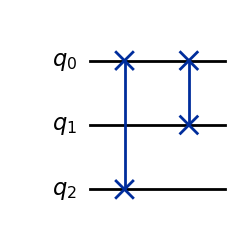

In [4]:
from qiskit import QuantumRegister, QuantumCircuit
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator

# Define a quantum register with 3 qubits
qreg = QuantumRegister(3, 'q')
qc = QuantumCircuit(qreg)

# Left rotation using only two SWAP gates
qc.swap(qreg[0], qreg[2])  # Swap a and c
qc.swap(qreg[0], qreg[1])  # Swap c(previously a) and b

# Draw the circuit
print("The below drawing shows a 3 digit number abc, being rotated using two swap gates to bca, with a originally being q0 and c originally being q2")

qc.draw('mpl')



---

### Exercise 1.4
Define a Python function that takes a string parameter and returns a quantum circuit that prepares the desired state. The string is in the format used in `Statevector.from_label()`: each character in the string represents the state of a qubit and must be '0', '1', '+', '-', 'r', or 'l'.  (Any other characters in the string must be ignored.) The circuit returned from the function must take an input state of all zero to the desired state. The number of qubits is determined by the length of the string.  (To be more precise, it will depend on the number of valid characters in the string, since invalid characters must be ignored.)

Demonstrate your function by *drawing* a selection of circuits that result from a variety of input strings, and confirm that the circuit creates the desired state in every test case.  The test cases must collectively exercise all of the string characters and must include different numbers of qubits.


Original Input String (Filtered): 10+-rl

Commands Used:
q_0: X
q_2: H
q_3: H, Z
q_4: H, S
q_5: H, S†

Final Quantum Circuit:
     ┌───┐       
q_0: ┤ X ├───────
     └───┘       
q_1: ────────────
     ┌───┐       
q_2: ┤ H ├───────
     ├───┤ ┌───┐ 
q_3: ┤ H ├─┤ Z ├─
     ├───┤ ├───┤ 
q_4: ┤ H ├─┤ S ├─
     ├───┤┌┴───┴┐
q_5: ┤ H ├┤ Sdg ├
     └───┘└─────┘


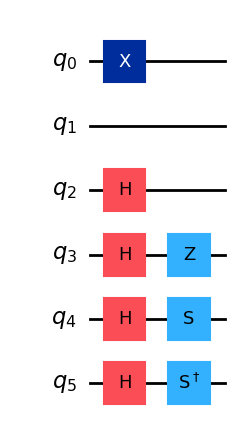

In [5]:
from qiskit import QuantumRegister, QuantumCircuit

def prepare_quantum_state(state_string: str):
    """
    Creates a quantum circuit that prepares the desired quantum state.
    
    Parameters:
        state_string (str): A string of valid state characters ('0', '1', '+', '-', 'r', 'l').
        
    Returns:
        QuantumCircuit: A quantum circuit that prepares the given state from |000...0⟩.
    """
    # Filter valid characters
    valid_chars = {'0', '1', '+', '-', 'r', 'l'}
    filtered_string = ''.join([char for char in state_string if char in valid_chars])
    
    # Define quantum register and circuit
    num_qubits = len(filtered_string)
    qreg = QuantumRegister(num_qubits, 'q')
    qc = QuantumCircuit(qreg)

    # List to store commands used
    commands = []

    # Apply gates based on character encoding
    for i, char in enumerate(filtered_string):
        if char == '1':
            qc.x(qreg[i])  # Apply X for |1>
            commands.append(f"q_{i}: X")
        elif char == '+':
            qc.h(qreg[i])  # Apply H for |+>
            commands.append(f"q_{i}: H")
        elif char == '-':
            qc.h(qreg[i])  # Apply H then Z for |->
            qc.z(qreg[i])
            commands.append(f"q_{i}: H, Z")
        elif char == 'r':
            qc.h(qreg[i])  # Apply H then S for |r>
            qc.s(qreg[i])
            commands.append(f"q_{i}: H, S")
        elif char == 'l':
            qc.h(qreg[i])  # Apply H then S† for |l>
            qc.sdg(qreg[i])
            commands.append(f"q_{i}: H, S†")

    # Print statements
    print("\nOriginal Input String (Filtered):", filtered_string)
    print("\nCommands Used:")
    for command in commands:
        print(command)
    
    print("\nFinal Quantum Circuit:")
    print(qc)

    return qc  # Return the prepared quantum circuit
# Example input state
state_str = "10+-rlX!@"  # Extra invalid characters included

# Generate the circuit
qc = prepare_quantum_state(state_str)

# Draw the circuit
qc.draw('mpl')



---

### Exercise 1.5
Define a Python function that takes a string parameter (as described in 1.4) and does the following: (1) prepares the specified state, and (2) swaps the state of each even-indexed qubit with its next-highest neighbor. Qubit 0 will be swapped with qubit 1, qubit 2 will be swapped with qubit 3, and so forth.  If the number of qubits is odd, then the most significant qubit must be unchanged.

For full credit, use the function from 1.4 to perform the state preparation action.

Demonstrate your function by *drawing* a selection of circuits that result from a variety of input strings, and confirm that the circuit creates the desired state in every test case.  The test cases must collectively exercise all of the string characters and must include different numbers of qubits. 


Quantum Circuit for Input: '01+-'
                  
q_0: ───────X─────
     ┌───┐  │     
q_1: ┤ X ├──X─────
     ├───┤        
q_2: ┤ H ├──────X─
     ├───┤┌───┐ │ 
q_3: ┤ H ├┤ Z ├─X─
     └───┘└───┘   

Quantum Circuit for Input: 'r+1'
     ┌───┐┌───┐   
q_0: ┤ H ├┤ S ├─X─
     ├───┤└───┘ │ 
q_1: ┤ H ├──────X─
     ├───┤        
q_2: ┤ X ├────────
     └───┘        

Quantum Circuit for Input: '1'
   ┌───┐
q: ┤ X ├
   └───┘

Quantum Circuit for Input: '10+-rl'
     ┌───┐          
q_0: ┤ X ├───X──────
     └───┘   │      
q_1: ────────X──────
     ┌───┐          
q_2: ┤ H ├────────X─
     ├───┤ ┌───┐  │ 
q_3: ┤ H ├─┤ Z ├──X─
     ├───┤ ├───┤    
q_4: ┤ H ├─┤ S ├──X─
     ├───┤┌┴───┴┐ │ 
q_5: ┤ H ├┤ Sdg ├─X─
     └───┘└─────┘   


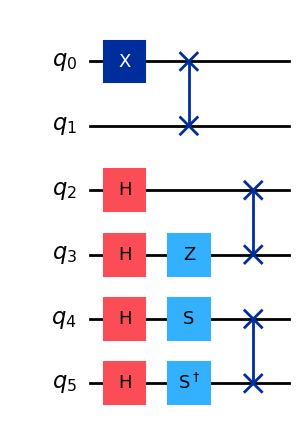

In [6]:
from qiskit import QuantumRegister, QuantumCircuit
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator

# Import the function from Exercise 1.4
def prepare_quantum_state(state_string: str):
    """
    Creates a quantum circuit that prepares the desired quantum state.
    """
    # Filter valid characters
    valid_chars = {'0', '1', '+', '-', 'r', 'l'}
    filtered_string = ''.join([char for char in state_string if char in valid_chars])
    
    # Define quantum register and circuit
    num_qubits = len(filtered_string)
    qreg = QuantumRegister(num_qubits, 'q')
    qc = QuantumCircuit(qreg)

    # Apply gates based on character encoding
    for i, char in enumerate(filtered_string):
        if char == '1':
            qc.x(qreg[i])
        elif char == '+':
            qc.h(qreg[i])
        elif char == '-':
            qc.h(qreg[i])
            qc.z(qreg[i])
        elif char == 'r':
            qc.h(qreg[i])
            qc.s(qreg[i])
        elif char == 'l':
            qc.h(qreg[i])
            qc.sdg(qreg[i])

    return qc

def prepare_and_swap_state(state_string: str):
    """
    Prepares the specified quantum state and swaps even-indexed qubits with their next-highest neighbor.
    
    Parameters:
        state_string (str): A string of valid state characters ('0', '1', '+', '-', 'r', 'l').
        
    Returns:
        QuantumCircuit: A quantum circuit that prepares the state and swaps even-indexed qubits.
    """
    # Prepare the quantum state using the function from Exercise 1.4
    qc = prepare_quantum_state(state_string)
    num_qubits = qc.num_qubits

    # Apply SWAP gates to even-indexed qubits
    for i in range(0, num_qubits - 1, 2):  # Step by 2 (q0 ↔ q1, q2 ↔ q3, ...)
        qc.swap(i, i + 1)

    # Print the circuit and return it
    print(f"\nQuantum Circuit for Input: '{state_string}'")
    print(qc)
    return qc
    # Test 1: Even number of qubits
qc1 = prepare_and_swap_state("01+-")

# Test 2: Odd number of qubits
qc2 = prepare_and_swap_state("r+1")

# Test 3: Single qubit (should remain unchanged)
qc3 = prepare_and_swap_state("1")

# Test 4: All valid characters
qc4 = prepare_and_swap_state("10+-rl")

# Draw the circuits
qc1.draw('mpl')
qc2.draw('mpl')
qc3.draw('mpl')
qc4.draw('mpl')

